***

## Pandas第二课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas2/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。


## 作业
- 作业所需数据文件位于0.Teacher/data目录下
***

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### 1.读入0.Teacher/Data/下NVDA.csv中的数据


In [11]:
df = pd.read_csv("NVDA.csv")
df.columns = [x.lower().replace(" ", "_") for x in df.columns]
df.head()

,date,open,high,low,close,adj_close,volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


#### 2.请计算nvda股票Adj Close每天的log return (log return就是今天的价格除以昨天的，然后取log)

In [12]:
df["yesterday_close"] = df.adj_close.shift(1)
df["log_return"] = np.log(df.adj_close / df.yesterday_close)
df.head()

,date,open,high,low,close,adj_close,volume,yesterday_close,log_return
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200,NaN,NaN
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000,1.523430,0.099630
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000,1.683028,-0.080762
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200,1.552448,-0.003121
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000,1.547611,-0.003129


#### 3.请找出nvda股票涨幅最大的10天

In [16]:
max_increase_10days = df.sort_values(by=["log_return"], ascending=False).iloc[:10]["date"].tolist()
max_increase_10days

['2000-03-07',
 '2003-05-09',
 '2001-01-03',
 '2016-11-11',
 '2000-03-13',
 '2000-12-22',
 '2000-12-08',
 '2000-04-05',
 '2003-02-14',
 '1999-08-19']

#### 4. 将这十天的股票信息都输出来

In [17]:
df.sort_values(by=["log_return"], ascending=False).iloc[:10]

,date,open,high,low,close,adj_close,volume,yesterday_close,log_return
283,2000-03-07,6.250000,7.270833,5.979167,6.942708,6.446771,48805200,4.526765,0.353572
1079,2003-05-09,6.276667,7.176667,6.100000,7.123333,6.614493,230771400,4.970930,0.285656
492,2001-01-03,4.833333,6.572917,4.708333,6.520833,6.055031,22759200,4.633162,0.267650
4482,2016-11-11,79.510002,88.769997,78.500000,87.970001,87.635475,54335100,67.512283,0.260876
287,2000-03-13,8.916667,12.500000,8.833333,12.437500,11.549053,60379200,9.130910,0.234938
486,2000-12-22,5.020833,6.375000,5.020833,5.843750,5.426314,23727000,4.313969,0.229402
476,2000-12-08,7.447917,8.333333,6.752600,8.291667,7.699371,21334800,6.267828,0.205709
304,2000-04-05,6.312500,8.125000,5.989583,7.640625,7.094833,15990000,5.803545,0.200898
1021,2003-02-14,3.740000,4.016667,3.650000,4.013333,3.726649,88721100,3.054985,0.198735
145,1999-08-19,1.994792,2.364583,1.927083,2.260417,2.098948,49174800,1.731391,0.192511


#### 5把英伟达每个月最后一天的股价记录下来，做成一张新的月线图，然后把Adj Close画成一张图

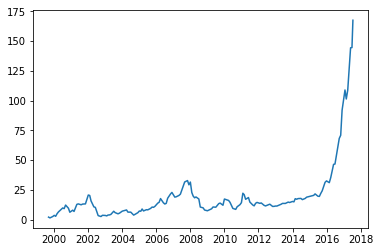

In [42]:
from datetime import datetime, timedelta


def get_end_month_date(end_date, months):
    # end_date = "2019-04-15"
    lst = [end_date]
    now_date = datetime.strptime(end_date, "%Y-%m-%d")
    for _ in range(1, months):
        first_day = now_date.replace(day=1)
        now_date =  first_day - timedelta(days=1)
        lst.append(datetime.strftime(now_date, "%Y-%m-%d"))
    return set(lst)

end_dates_of_month = get_end_month_date("2017-07-20", 18*12)
df_end_dates = df[df.date.isin(end_dates_of_month)]
# df_end_dates
df_end_dates.set_index(pd.to_datetime(df_end_dates.date), inplace=True)

plt.plot(df_end_dates.index, df_end_dates.adj_close)
plt.show()

#### 6.使用concat方法把英伟达的Adj Close与其他三只股票拼接在一起

In [44]:
df_nvda = pd.read_csv("NVDA.csv")
df_nvda.columns = [x.lower().replace(" ", "_") for x in df_nvda.columns]
df_apple = pd.read_csv("AAPL.csv")
df_apple.columns = [x.lower().replace(" ", "_") for x in df_apple.columns]
df_google = pd.read_csv("GOOG.csv")
df_google.columns = [x.lower().replace(" ", "_") for x in df_google.columns]
df_ms = pd.read_csv("MSFT.csv")
df_ms.columns = [x.lower().replace(" ", "_") for x in df_ms.columns]

df_new = pd.concat([df_nvda, df_ms, df_apple, df_google])
df_new.head()

,date,open,high,low,close,adj_close,volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000.0


#### 7.从Google有数据的那一天起开始画出四只股票的Adj Close折线图


[]

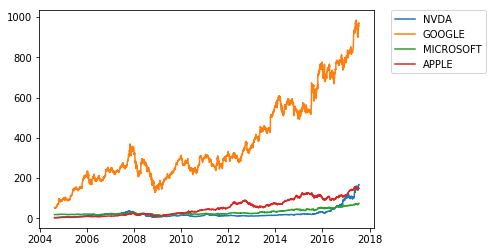

In [52]:
startdate = df_google.loc[0, "date"]

def draw(df, label):
    df = df[df.date > startdate]
    plt.plot(pd.to_datetime(df.date), df.adj_close, label=label)

draw(df_nvda, "NVDA")
draw(df_google, "GOOGLE")
draw(df_ms, "MICROSOFT")
draw(df_apple, "APPLE")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.plot()

